In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [95]:
data = pd.read_csv("newspaper_readers_data.csv")
data.head()

,Unnamed: 0,ID,ID_ORIGINAL,Gender,Portuguese_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,JournalReader,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Household_Income
0,0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,Strong involvement,No,City,7000
1,1,1001,461212,Female,No,30,No,High,6.0,0,1.0,Nothing,Strong involvement,No,City,19610
2,2,1002,466216,Male,No,29,No,High,4.0,0,1.0,Private company,No involvement,Yes,Country-side,8261
3,3,1003,462613,Female,Yes,35,No,Low,5.0,0,1.0,Private company,Strong involvement,Yes,Country-side,7000
4,4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,No involvement,No,City,8261


In [96]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns = {'JournalReader':'Newspaper_Reader'},inplace=True)
data.dropna(subset =['Portuguese_Citizenship','Frequent_Traveler','Satisfaction_Level','Occupation','Political_Participation','Social_Person','Area_Residence'],inplace=True)
data.isnull().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Portuguese_Citizenship     0
Age                        0
Frequent_Traveler          0
Cellphone_Usage            0
Household_Size             0
Newspaper_Reader           0
Satisfaction_Level         0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Household_Income           0
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7316 non-null   int64  
 1   ID_ORIGINAL              7316 non-null   int64  
 2   Gender                   7316 non-null   object 
 3   Portuguese_Citizenship   7316 non-null   object 
 4   Age                      7316 non-null   int64  
 5   Frequent_Traveler        7316 non-null   object 
 6   Cellphone_Usage          7316 non-null   object 
 7   Household_Size           7316 non-null   float64
 8   Newspaper_Reader         7316 non-null   int64  
 9   Satisfaction_Level       7316 non-null   float64
 10  Occupation               7316 non-null   object 
 11  Political_Participation  7316 non-null   object 
 12  Social_Person            7316 non-null   object 
 13  Area_Residence           7316 non-null   object 
 14  Household_Income         7316

In [98]:
le = LabelEncoder()
ge = LabelEncoder()
le1 = LabelEncoder()
ge1 = LabelEncoder()
le2 = LabelEncoder()
ge2 = LabelEncoder()
le3 = LabelEncoder()
ge3 = LabelEncoder()
data['Gender'] = ge.fit_transform(data['Gender'])
data['Portuguese_Citizenship'] = le.fit_transform(data['Portuguese_Citizenship'])
data['Frequent_Traveler'] = le1.fit_transform(data['Frequent_Traveler'])
data['Cellphone_Usage'] = ge1.fit_transform(data['Cellphone_Usage'])
data['Occupation'] = le2.fit_transform(data['Occupation'])
data['Political_Participation'] = ge2.fit_transform(data['Political_Participation'])
data['Social_Person'] = le3.fit_transform(data['Social_Person'])
data['Area_Residence'] = ge3.fit_transform(data['Area_Residence'])

In [99]:
data.head(5)

,ID,ID_ORIGINAL,Gender,Portuguese_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Newspaper_Reader,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Household_Income
0,1000,467329,0,0,40,1,2,1.0,1,4.0,0,2,0,0,7000
1,1001,461212,0,0,30,0,1,6.0,0,1.0,1,2,0,0,19610
2,1002,466216,1,0,29,0,1,4.0,0,1.0,2,0,1,1,8261
3,1003,462613,0,1,35,0,2,5.0,0,1.0,2,2,1,1,7000
4,1004,465709,1,1,68,1,0,2.0,1,4.0,2,0,0,0,8261


In [100]:
y = data["Newspaper_Reader"]
x = data.drop(["Newspaper_Reader"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=30)

In [102]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred)
print(f"Accuracy by logistic Regression:= {accuracy_lr :2f}\n")
print("Classification Report By Logistic Regression Algorithm \n")
print(classification_report(y_test,y_pred))

Accuracy by logistic Regression:= 0.740437

Classification Report By Logistic Regression Algorithm 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       753
           1       0.73      0.73      0.73       711

    accuracy                           0.74      1464
   macro avg       0.74      0.74      0.74      1464
weighted avg       0.74      0.74      0.74      1464



In [103]:
Kclassifier_model = KNeighborsClassifier(n_neighbors = 5)
Kclassifier_model.fit(X_train,y_train)
y_pred_kclassifier = Kclassifier_model.predict(X_test)
accuracy_kclassifier = accuracy_score(y_test,y_pred_kclassifier)
print(f"Accuracy by KNN:= {accuracy_kclassifier :2f}\n")
print("Classification Report By KNN Algorithm \n")
print(classification_report(y_test,y_pred_kclassifier))

Accuracy by KNN:= 0.858607

Classification Report By KNN Algorithm 

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       753
           1       0.86      0.84      0.85       711

    accuracy                           0.86      1464
   macro avg       0.86      0.86      0.86      1464
weighted avg       0.86      0.86      0.86      1464



In [104]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_pred_NB = NB_model.predict(X_test)
accuracy_NB = accuracy_score(y_test,y_pred_NB)
print(f"Accuracy by naive bayes:= {accuracy_NB :2f}\n")
print("Classification Report By Naive bayes Algorithm \n")
print(classification_report(y_test,y_pred_NB))

Accuracy by naive bayes:= 0.747951

Classification Report By Naive bayes Algorithm 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       753
           1       0.72      0.78      0.75       711

    accuracy                           0.75      1464
   macro avg       0.75      0.75      0.75      1464
weighted avg       0.75      0.75      0.75      1464



In [105]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
accuracy_RF = accuracy_score(y_test,y_pred_RF)
print(f"Accuracy by Random Forest Classifier:= {accuracy_RF :2f}\n")
print("Classification Report By Random Forest Algorithm \n")
print(classification_report(y_test,y_pred_RF))

Accuracy by Random Forest Classifier:= 0.916667

Classification Report By Random Forest Algorithm 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       753
           1       0.91      0.92      0.91       711

    accuracy                           0.92      1464
   macro avg       0.92      0.92      0.92      1464
weighted avg       0.92      0.92      0.92      1464



In [106]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
y_pred_SVM = SVM_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test,y_pred_SVM)
print(f"Accuracy by SVM Classifier:= {accuracy_SVM :2f}\n")
print("Classification Report By SVM Algorithm \n")
print(classification_report(y_test,y_pred_SVM))

Accuracy by SVM Classifier:= 0.900956

Classification Report By SVM Algorithm 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       753
           1       0.89      0.91      0.90       711

    accuracy                           0.90      1464
   macro avg       0.90      0.90      0.90      1464
weighted avg       0.90      0.90      0.90      1464



In [107]:
import xgboost as xgb
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
y_pred_XGB = XGB_model.predict(X_test)
accuracy_XGB = accuracy_score(y_test,y_pred_XGB)
print(f"Accuracy by XGBoost Algorithm := {accuracy_XGB :2f}\n")
print("Classification Report By XGBoost Algorithm \n")
print(classification_report(y_test,y_pred_XGB))

Accuracy by XGBoost Algorithm := 0.909153

Classification Report By XGBoost Algorithm 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       753
           1       0.90      0.91      0.91       711

    accuracy                           0.91      1464
   macro avg       0.91      0.91      0.91      1464
weighted avg       0.91      0.91      0.91      1464



In [108]:
SVM_model1 = svm.SVC(probability=True)
voting_classifier = VotingClassifier(
    estimators=[('lr', Kclassifier_model), ('rf', RF_model), ('svc', SVM_model1)], voting='soft')
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test,y_pred_voting)
print(f"Accuracy by Voting Classifier:= {accuracy_voting :2f}\n")
print("Classification Report By Voting Classifier \n")
print(classification_report(y_test,y_pred_voting))

Accuracy by Voting Classifier:= 0.908470

Classification Report By Voting Classifier 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       753
           1       0.91      0.91      0.91       711

    accuracy                           0.91      1464
   macro avg       0.91      0.91      0.91      1464
weighted avg       0.91      0.91      0.91      1464



In [114]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy',random_state=30)  
classifier.fit(X_train, y_train)  
y_pred_tree = classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test,y_pred_tree)
print(f"Accuracy by Decision Tree Classifier:= {accuracy_tree :2f}\n")
print("Classification Report By Decision Tree Algorithm \n")
print(classification_report(y_test,y_pred_tree))

Accuracy by Decision Tree Classifier:= 0.881148

Classification Report By Decision Tree Algorithm 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       753
           1       0.89      0.87      0.88       711

    accuracy                           0.88      1464
   macro avg       0.88      0.88      0.88      1464
weighted avg       0.88      0.88      0.88      1464



In [37]:
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=30)
bagging_classifier.fit(X_train, y_train)
y_pred_bagcla = classifier.predict(X_test)
accuracy_bagcla = accuracy_score(y_test,y_pred_bagcla)
print(f"Accuracy by Bagging Classifier:= {accuracy_bagcla :2f}\n")
print("Classification Report By Bagging Classifier\n")
print(classification_report(y_test,y_pred_bagcla))

Accuracy by Bagging Classifier:= 0.881148

Classification Report By Bagging Classifier

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       753
           1       0.89      0.87      0.88       711

    accuracy                           0.88      1464
   macro avg       0.88      0.88      0.88      1464
weighted avg       0.88      0.88      0.88      1464



In [110]:
from sklearn.ensemble import AdaBoostClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=40, learning_rate=1.0, random_state=20)
adaboost_classifier.fit(X_train, y_train)
y_pred_adb = adaboost_classifier.predict(X_test)
accuracy_adb = accuracy_score(y_test, y_pred_adb)
print(f"Accuracy by Ada Boost Algorithm:= {accuracy :2f}\n")
print("Classification Report By Ada Boost Algorithm \n")
print(classification_report(y_test,y_pred_adb))

Accuracy by Ada Boost Algorithm:= 0.907787

Classification Report By Ada Boost Algorithm 

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       753
           1       0.80      0.74      0.77       711

    accuracy                           0.78      1464
   macro avg       0.79      0.78      0.78      1464
weighted avg       0.79      0.78      0.78      1464



In [111]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
voting_regressor = VotingRegressor(
    estimators=[('lr', model1), ('dt', model2), ('rf', model3)])
voting_regressor.fit(X_train, y_train)
y_pred_votingR = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_votingR)
print(f'Mean Squared Error: {mse: .2f}')
accuracy_votingR = r2_score(y_test,y_pred_votingR)
print(f"Accuracy by voting_regressor:= {accuracy_votingR :2f}\n")
#print("Classification Report By Voting Regressor \n")
#print(classification_report(y_test,y_pred_votingR))

Mean Squared Error:  0.08
Accuracy by voting_regressor:= 0.664290



In [112]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train,y_train)
y_pred_GBR = model_GBR.predict(X_test)
accuracy_GBR = accuracy_score(y_test, np.abs(y_pred_GBR).round())
print(f"Accuracy by Gradient Boosting Regressor:= {accuracy_GBR :2f}\n")
print("Classification Report By  Gradient Boost Algorithm \n")
print(classification_report(y_test,np.abs(y_pred_GBR).round()))


Accuracy by Gradient Boosting Regressor:= 0.907787

Classification Report By  Gradient Boost Algorithm 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       753
           1       0.89      0.93      0.91       711

    accuracy                           0.91      1464
   macro avg       0.91      0.91      0.91      1464
weighted avg       0.91      0.91      0.91      1464



                   Model_Name  Model_Accuracy  Model_Accuracy_per
3               Random Forest        0.916667           91.666667
6                     XGBoost        0.909153           90.915301
7           Voting Classifier        0.908470           90.846995
10  GradientBoostingRegressor        0.907787           90.778689
4                         SVM        0.900956           90.095628
5               Decision Tree        0.881148           88.114754
8          Bagging Classifier        0.881148           88.114754
1                         KNN        0.858607           85.860656
9        Ada Boost Classifier        0.784836           78.483607
2                  Naive Byes        0.747951           74.795082
0        Logisitic Regression        0.740437           74.043716


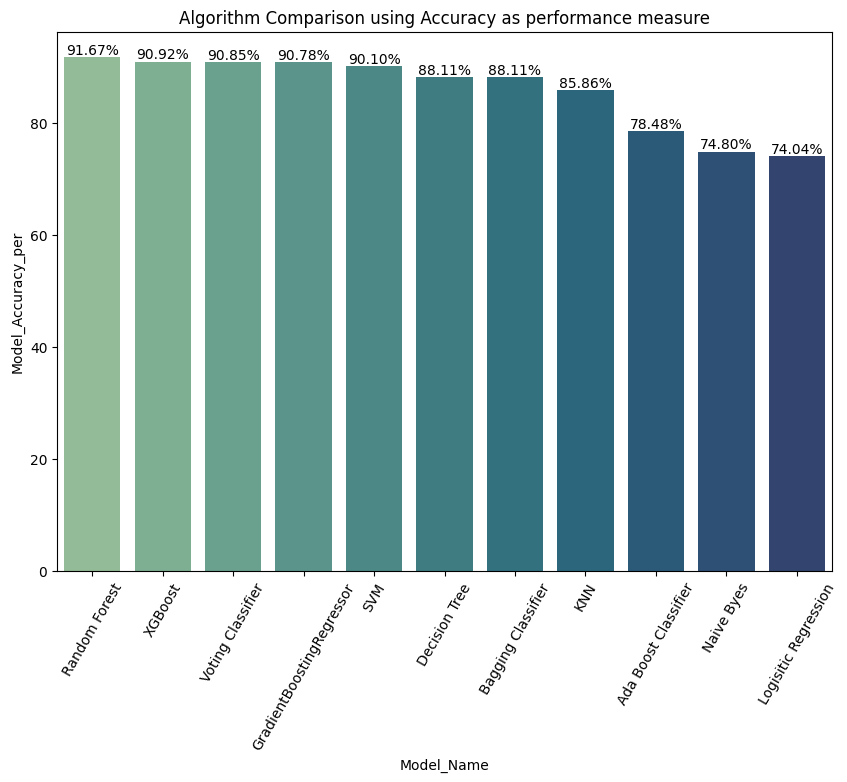

In [115]:
model_name =['Logisitic Regression','KNN','Naive Byes','Random Forest','SVM','Decision Tree','XGBoost','Voting Classifier','Bagging Classifier','Ada Boost Classifier','GradientBoostingRegressor']
model_accuracy = [accuracy_lr,accuracy_kclassifier,accuracy_NB,accuracy_RF,accuracy_SVM,accuracy_tree,accuracy_XGB,accuracy_voting,accuracy_bagcla,accuracy_adb,accuracy_GBR]  
dict = {'Model_Name':model_name ,'Model_Accuracy': model_accuracy }
df = pd.DataFrame(dict)
df['Model_Accuracy_per'] = df['Model_Accuracy'] * 100
df_new = df.sort_values(by=['Model_Accuracy_per'], ascending=False)
print(df_new)
plt.figure(figsize = (10,7))
plt.title('Algorithm Comparison using Accuracy as performance measure')
plt.xticks(rotation=60)
plt.ylabel('Model Name')
plt.xlabel('Model Accuracy')
#ax = df_new.plot(kind='bar', color='lightseagreen', edgecolor='black')
ax = sns.barplot(x ='Model_Name' , y = 'Model_Accuracy_per',data = df_new, palette="crest")
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2f%%')
plt.show()